# Polynomial Regression

## Polynomial regression is an non-linear regression model whose equation is given by : $$ Y = w_2x^2 + w_1x + w_0$$ with 2 degree polynomial . Here x is the single independent varaible

### Here we will show how to use polynomial regression with one Independent variable and one dependent variable. Polynomial regression is also called Polynomial linear regression as some ploynomial value is added to the linear model. We solve polynomial regression same as linear regression  but before we have to add polymomial value to x variable . General equation of polynomial regression with one Independent variable is given by $$ Y=w_nx^n+w_{n-1}x^{n-1}+...+w_3x^3+w_2x^2 + w_1x + w_0$$

In [1]:
from itertools import combinations_with_replacement
import numpy as np

In [2]:
# add polynomial features to the independent matrix(X)

In [155]:
def polynomial_features(X,degree=2):
    combo = [combinations_with_replacement(range(X.shape[1]),i) for i in range(1,degree+1)]
    combinations =[j for i in combo for j in i]
    new_X = np.zeros((X.shape[0],len(combinations)))
    for i,index_combo in enumerate(combinations):
        new_X[:,i] = np.prod(X[:,index_combo],axis=1)
    return new_X

In [157]:
x =np.array([
    [1,],
    [2],
    [3],
    [4]
])
new_x=polynomial_features(x)

In [158]:
new_x

array([[ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.]])

### In this new _X which is returned by polynomial_features we will apply the same linear regression algorithm to get different coefficient values

In [159]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [160]:
data = pd.read_csv('Position_Salaries.csv')

In [161]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [162]:
X = data['Level'].values.reshape(-1,1)
Y = data['Salary']

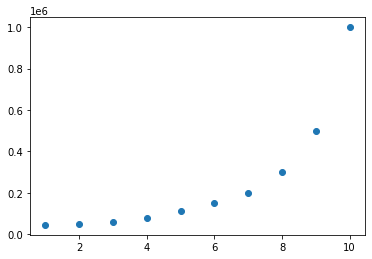

In [163]:
plt.scatter(X,Y)

In [164]:
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
y_pred = lin_reg.coef_ * X + lin_reg.intercept_

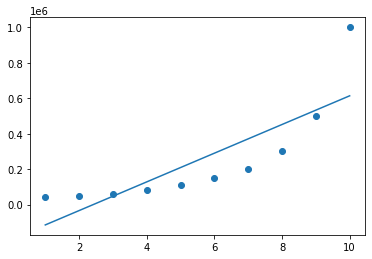

In [165]:
plt.scatter(X,Y)
plt.plot(X,y_pred)

### As we can see the linear regression does not fit the data well so we use non-linear regression algorithm like polynomial regression


In [166]:
x_new = polynomial_features(X,degree=4)

In [167]:
x_new

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [168]:
poly_reg = LinearRegression()
poly_reg.fit(x_new,Y)

LinearRegression()

In [169]:
poly_reg.coef_

array([-211002.33100235,   94765.44289045,  -15463.28671329,
           890.15151515])

In [170]:
poly_reg.intercept_

184166.66666668747

In [171]:
y_predict_poly = poly_reg.intercept_ + poly_reg.coef_[0]*x_new[:,0]+poly_reg.coef_[1]*x_new[:,1]+poly_reg.coef_[2]*x_new[:,2]+poly_reg.coef_[3]*x_new[:,3]

In [173]:
y_predict_poly

array([ 53356.64335665,  31759.90675992,  58642.1911422 ,  94632.86713289,
       121724.94172497, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.6386946 , 988916.08391599])

In [172]:
poly_reg.predict(x_new)

array([ 53356.64335665,  31759.90675992,  58642.1911422 ,  94632.86713289,
       121724.94172497, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.6386946 , 988916.08391599])

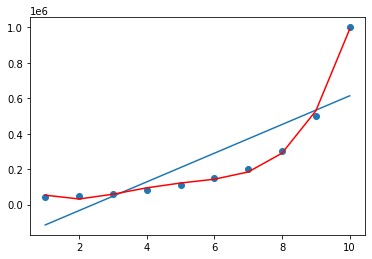

In [174]:
plt.scatter(X,Y)
plt.plot(X,y_pred)
plt.plot(X,y_predict_poly,color='red')

## Conclusion : As we can see the curve in red fits the data well. But it changes when we change the degree, so we should choose degree precisely